In [28]:
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Function to fetch historical price data
def fetch_historical_price_data(coin_id, date_from, date_to):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart/range"
    params = {
        'vs_currency': 'usd',
        'from': datetime.strptime(date_from, "%Y-%m-%d").timestamp(),
        'to': datetime.strptime(date_to, "%Y-%m-%d").timestamp()
    }
    response = requests.get(url, params=params)
    data = response.json()
    prices = data['prices']  # Fetching price data
    df = pd.DataFrame(prices, columns=['timestamp', 'price_usd'])
    df['date'] = pd.to_datetime(df['timestamp'], unit='ms').dt.date
    return df[['date', 'price_usd']]

# Ethereum ID from CoinGecko
ethereum_id = 'ethereum'

# Fetch data
ethereum_data = fetch_historical_price_data(ethereum_id, '2015-01-01', '2024-01-31')

print(ethereum_data)


            date    price_usd
0     2015-08-07     2.831620
1     2015-08-08     1.330750
2     2015-08-10     0.687586
3     2015-08-11     1.067379
4     2015-08-12     1.256613
...          ...          ...
3094  2024-01-27  2268.870732
3095  2024-01-28  2267.907852
3096  2024-01-29  2257.054465
3097  2024-01-30  2314.594728
3098  2024-01-31  2344.001400

[3099 rows x 2 columns]


In [72]:
import requests
import pandas as pd
from datetime import datetime

# Function to fetch historical price data
def fetch_historical_price_data(coin_id, date_from, date_to):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart/range"
    params = {
        'vs_currency': 'usd',
        'from': datetime.strptime(date_from, "%Y-%m-%d").timestamp(),
        'to': datetime.strptime(date_to, "%Y-%m-%d").timestamp()
    }
    response = requests.get(url, params=params)
    data = response.json()
    prices = data['prices']  # Fetching price data
    df = pd.DataFrame(prices, columns=['timestamp', 'price_usd'])
    df['date'] = pd.to_datetime(df['timestamp'], unit='ms').dt.date
    return df[['date', 'price_usd']]

# Ethereum ID from CoinGecko
ethereum_id = 'ethereum'

# Fetch data
ethereum_data = fetch_historical_price_data(ethereum_id, '2022-01-01', '2023-03-15')

# Calculate daily returns
ethereum_data['daily_return'] = ethereum_data['price_usd'].pct_change()


In [62]:
ethereum_data=ethereum_data.loc['2016':]

In [73]:

# Find the worst one-day return
worst_one_day_return = ethereum_data['daily_return'].min()
print("Worst one-day return:", worst_one_day_return)

date_of_worst_return = ethereum_data.loc[ethereum_data['daily_return'] == worst_one_day_return, 'date'].iloc[0]
print("Date of worst one-day return:", date_of_worst_return)



Worst one-day return: -0.17919966902342466
Date of worst one-day return: 2022-11-10


In [74]:
ethereum_data

,date,price_usd,daily_return
70,2022-03-13,2579.458136,0.006487
71,2022-03-14,2518.492845,-0.023635
72,2022-03-15,2591.542041,0.029005
73,2022-03-16,2620.363852,0.011121
74,2022-03-17,2771.759457,0.057777
75,2022-03-18,2817.401075,0.016467
76,2022-03-19,2945.745910,0.045554
77,2022-03-20,2947.226158,0.000503
78,2022-03-21,2860.641961,-0.029378
79,2022-03-22,2896.586932,0.012565


In [75]:
ethereum_data.sort_values('daily_return')

,date,price_usd,daily_return
312,2022-11-10,1095.183977,-0.179200
163,2022-06-14,1205.595286,-0.171234
311,2022-11-09,1334.287933,-0.150129
20,2022-01-22,2564.343342,-0.149638
166,2022-06-17,1068.603575,-0.131474
...,...,...,...
169,2022-06-20,1125.754092,0.131124
207,2022-07-28,1636.949181,0.137570
198,2022-07-19,1570.658959,0.168019
313,2022-11-11,1301.553880,0.188434


In [38]:
import requests
import pandas as pd
from datetime import datetime

# Function to fetch historical price data
def fetch_historical_price_data(coin_id, date_from, date_to):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart/range"
    params = {
        'vs_currency': 'usd',
        'from': datetime.strptime(date_from, "%Y-%m-%d").timestamp(),
        'to': datetime.strptime(date_to, "%Y-%m-%d").timestamp()
    }
    response = requests.get(url, params=params)
    data = response.json()
    prices = data['market_caps']  # Fetching price data
    df = pd.DataFrame(prices, columns=['timestamp', 'market_caps'])
    df['date'] = pd.to_datetime(df['timestamp'], unit='ms').dt.date
    return df[['date', 'market_caps']]


# Fetch data
df = fetch_historical_price_data('dai', '2013-01-01', '2024-03-15')



In [44]:
df.index=pd.to_datetime(df['date'])

<Axes: xlabel='date'>

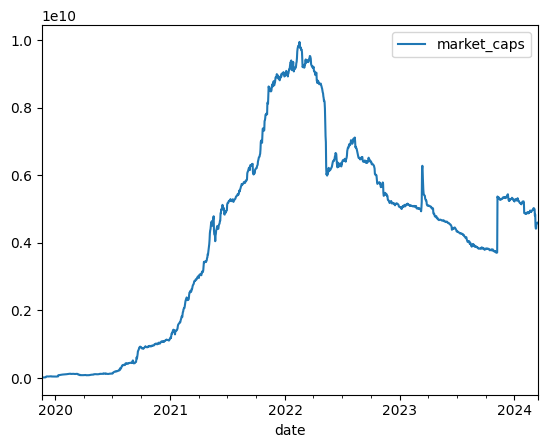

In [45]:
df.plot()

<Axes: xlabel='date'>

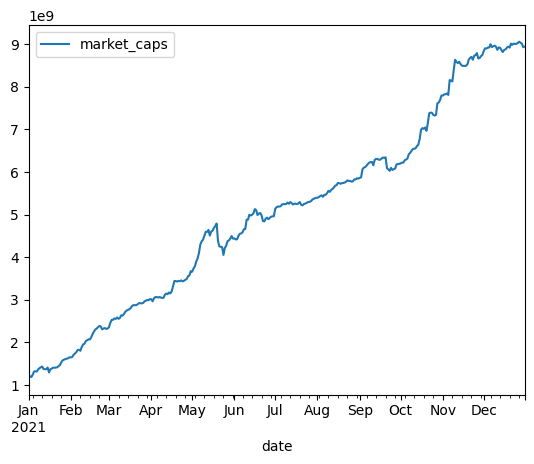

In [48]:
df.loc['2021'].plot()

In [49]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Function to fetch historical price data
def fetch_historical_price_data(coin_id, date_from, date_to, interval='hourly'):
    # CoinGecko doesn't directly support 5-minute intervals via its free API, so we'll use 'hourly' as a fallback
    # Prepare the date range for hourly data
    start_timestamp = datetime.strptime(date_from, "%Y-%m-%d").timestamp()
    end_timestamp = datetime.strptime(date_to, "%Y-%m-%d").timestamp()
    
    # Initialize DataFrame
    df_full = pd.DataFrame(columns=['timestamp', 'price_usd'])
    
    while start_timestamp < end_timestamp:
        # Fetch data by chunks, since there might be a limit to the number of data points returned in one call
        url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart/range"
        params = {
            'vs_currency': 'usd',
            'from': start_timestamp,
            'to': start_timestamp + 3600 * 24  # Increment by one day in seconds, adjust if necessary
        }
        response = requests.get(url, params=params)
        data = response.json()
        prices = data['prices']  # Assuming 'prices' holds the desired data
        df_chunk = pd.DataFrame(prices, columns=['timestamp', 'price_usd'])
        df_full = pd.concat([df_full, df_chunk])
        
        # Move to the next chunk
        start_timestamp += 3600 * 24  # Increment by one day, adjust if necessary

    df_full['date'] = pd.to_datetime(df_full['timestamp'], unit='ms').dt.to_pydatetime()
    return df_full[['date', 'price_usd']]

# USDC ID from CoinGecko
usdc_id = 'usd-coin'

# Fetch data
usdc_data = fetch_historical_price_data(usdc_id, '2023-03-10', '2023-03-13', 'hourly')

print(usdc_data)


                      date  price_usd
0  2023-03-10 10:02:03.945   1.002182
1  2023-03-10 11:02:45.769   0.999984
2  2023-03-10 12:02:20.351   1.001913
3  2023-03-10 13:00:07.317   1.000314
4  2023-03-10 14:02:11.289   0.993705
..                     ...        ...
19 2023-03-13 05:02:06.815   0.984236
20 2023-03-13 06:02:12.183   0.983871
21 2023-03-13 07:02:05.305   0.984691
22 2023-03-13 08:02:51.101   0.980324
23 2023-03-13 09:00:23.293   0.989727

[72 rows x 2 columns]


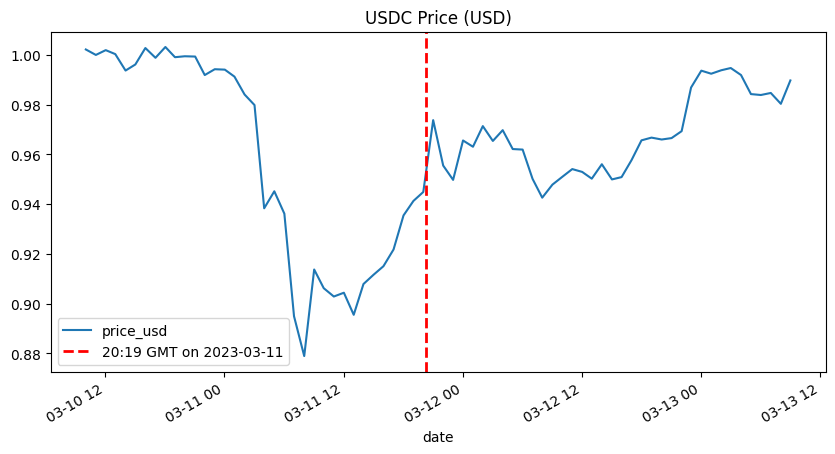

In [52]:
import matplotlib.pyplot as plt

# Plotting the USDC price data
usdc_data.plot(x='date', y='price_usd', title='USDC Price (USD)', figsize=(10, 5))

# Adding a vertical line at 20:19 GMT on March 11, 2023
specific_datetime = datetime(2023, 3, 11, 20, 19)
plt.axvline(x=specific_datetime, color='red', linestyle='--', linewidth=2, label='20:19 GMT on 2023-03-11')

# Adding legend to the plot to explain the red line
plt.legend()

# Show plot
plt.show()
